# 2018101042

# Excercise 2

In Excercise 1, we computed the LDA for a multi-class problem, the IRIS dataset. In this excercise, we will now compare the LDA and PCA for the IRIS dataset.

To revisit, the iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="iris_petal_sepal.png">



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import pi

### Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

dataset.tail()

sepal-length  sepal-width  petal-length  petal-width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

### Data preprocessing

Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [3]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

The following code divides data into training and test sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Scaling

We will now perform feature scaling as part of data preprocessing too. For this task, we will be using scikit learn `StandardScalar`.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Write your code below

Write your code to compute the PCA and LDA on the IRIS dataset below.

In [6]:
# Calculating covariance of an input matrix
def calc_cov_matrix(X_input):
    n_samples = np.shape(X_input)[0]
    cov_matrix = np.array((1 / (n_samples-1)) * (X_input - X_input.mean(axis=0)).T.dot(X_input - X_input.mean(axis=0)))

    return cov_matrix

In [7]:
import seaborn as sns; sns.set();

# Function to plot our input data for classification tasks. Source: utils
def plot_2D_input_datapoints(X_inp, y_inp):
    sns.set()
    print(X_inp.shape)
    X_inp = X_inp[:, :2]
    print(X_inp.shape)
    inp_data = np.hstack((X_inp, y_inp.reshape(-1, 1)))
    print(inp_data.shape)
    df = pd.DataFrame(data=inp_data, columns=["$X_0$", "$X_1$", "$y$"])
    print(df.shape)
    sns.scatterplot(data=df, x="$X_0$", y="$X_1$", hue="$y$", legend='full')
    plt.title('Input data')
    plt.legend(loc='lower right')

In [8]:
def LDA_train(X_train, y_train):
    classes = np.unique(y_train)
    d = X_train.shape[1]
    # Caluclate the centre of all the points in the training set
    X_mean_all = X_train.mean(0)
    # initialing Sw and Sb (within class scatter) here
    Sw = np.zeros((d,d))
    Sb = np.zeros((d,d))
    mean_subtracted_class_means = np.zeros((len(classes),d))
    # For each class
    for i in range(len(classes)):
        # collect all sampels of that calasss
        x_class = X_train[np.argwhere(y_train == classes[i])[:, 0]]
        # Get number of sampels in the calss
        num_class = x_class.shape[0]
        # Computing class mean
        mean_class = x_class.mean(0)
        # Computing Sw (within class spread)
        Sw_class = calc_cov_matrix(x_class)
        #Sw += Sw_class*num_class
        Sw += Sw_class
        # Computing Sb (keeping means in a special place)
        mean_subtracted_class_means[i] = mean_class - X_mean_all
    # Computing Sb finally
    class_means_diff = mean_subtracted_class_means.sum(0)
    class_means_diff = class_means_diff.reshape((-1, 1))
    Sb = np.dot(class_means_diff,class_means_diff.T)
    
    # Calculating the target weights
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb))

    # Getting the eigenvectors with the maximum eigenvalue.
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:2]
    weights = np.atleast_1d(eigvecs[:, idx])[:, :2]

    return weights.real

In [9]:
LDAweights = LDA_train(X, y)
X.shape, LDAweights.shape

((150, 4), (4, 2))

(150, 2)
(150, 2)
(150, 3)
(150, 3)


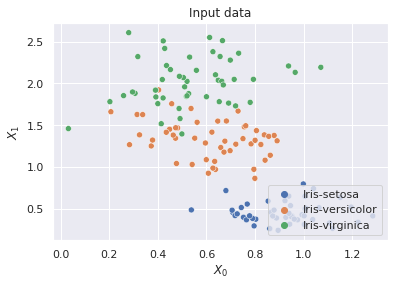

In [10]:
X_new_dim = np.dot(X,LDAweights)
plot_2D_input_datapoints(X_new_dim, y)

In [11]:
### WRITE YOUR CODE HERE ####
def PCA_train(X_input):
    # Covariance matrix
    cov = calc_cov_matrix(X_input)
    # Eigenvalues and choose best two
    eigvals, eigvecs = np.linalg.eig(cov)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:2]
    weights = np.atleast_1d(eigvecs[:, idx])[:, :2]
    return weights

In [12]:
PCAweights = PCA_train(X)
X.shape, PCAweights.shape

((150, 4), (4, 2))

(150, 2)
(150, 2)
(150, 3)
(150, 3)


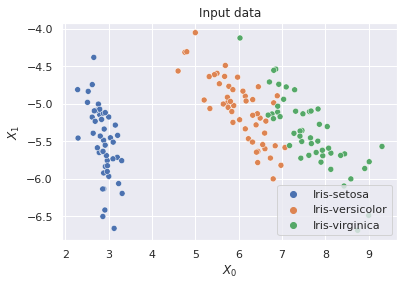

In [13]:
X_new_dim = np.dot(X,PCAweights)
plot_2D_input_datapoints(X_new_dim, y)

# CONCLUSION

PCA identifies those components that account for the most variance while LDA identifies those factors that account for the most variance between the classes while minimizing the within class variance / scatter.

LDA is a supervised algorithm: it needs known class labels to be able to work.

However PCA is an unsupervised algorithm: it does not require any class labels, and aims to extract those features that best distinct-tify the dataset.


However both PCA and LDA can be used to map a dataset from a higher dimension to a lower dimension quite effieciently, even though their goals might be different

# Using inbuilt functions (sci-kit learn)
<https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py>
[no changes made to the code obtained from the website]

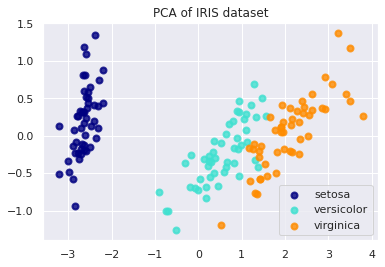

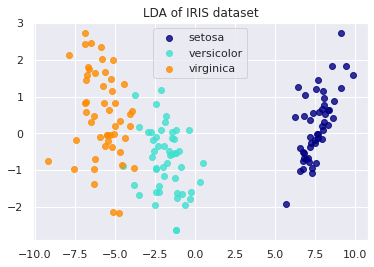

In [14]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()